In [40]:
from imputationLibrary import forwardFilling, hotDeck, meanImputation, movingAverage, splineInterpolation, randomSampleImputation
from imputationLibrary.util import util
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [41]:
INPUT = 'output/\CompleteWeeklyIndexes'

In [42]:
df = pd.read_csv(INPUT+'.csv', parse_dates=True, index_col=0).drop('vix_Close', axis=1)
df_train = df.loc['2000-01-01':'2015-01-01']
df_test = df.loc['2015-01-02':]

df_train_T = df_train.transpose()

In [44]:
df_train_0_imp = df_train_T.fillna(0)
scaler = preprocessing.StandardScaler()
scaler.fit(df_train_0_imp)
array = scaler.transform(df_train_0_imp)
df_scaled = pd.DataFrame(data=array, index=df_train_T.index, columns=df_train_T.columns)

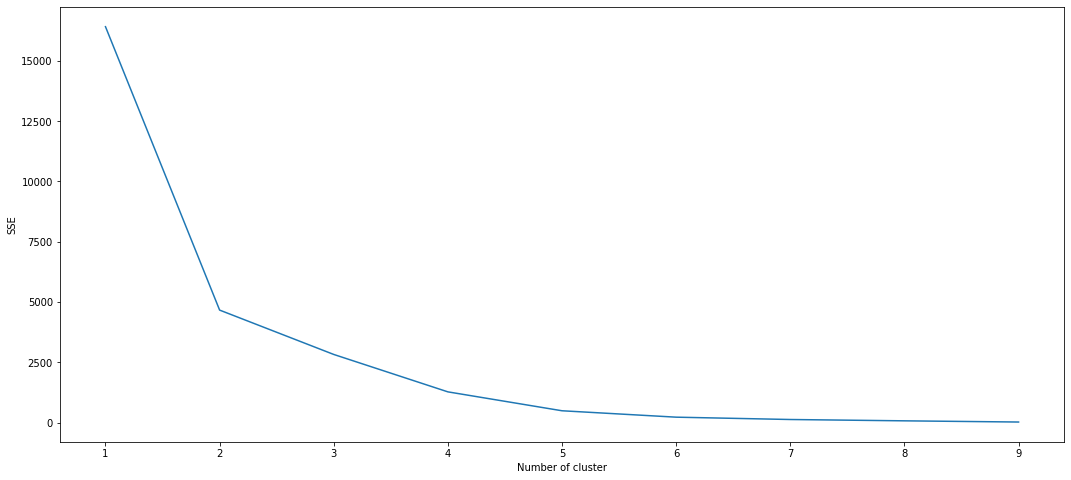

In [46]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_scaled)

    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(18,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [47]:
# Tem um joelho em 2, em 4 e em 5

In [59]:
kmeans_5 = KMeans(init="k-means++", n_clusters=5, n_init=4,
                random_state=0).fit(df_scaled)
kmeans_4 = KMeans(init="k-means++", n_clusters=4, n_init=4,
                random_state=0).fit(df_scaled)
kmeans_3 = KMeans(init="k-means++", n_clusters=3, n_init=4,
                random_state=0).fit(df_scaled)
kmeans_2 = KMeans(init="k-means++", n_clusters=2, n_init=4,
                random_state=0).fit(df_scaled)

In [67]:
df_train_T["clusters_5"] = kmeans_5.labels_
df_train_T["clusters_4"] = kmeans_4.labels_
df_train_T["clusters_3"] = kmeans_3.labels_
df_train_T["clusters_2"] = kmeans_2.labels_

In [69]:
print("Cluster 1 ", df_train_T[df_train_T['clusters_5'] == 0].index)
print("Cluster 2 ", df_train_T[df_train_T['clusters_5'] == 1].index)
print("Cluster 3 ", df_train_T[df_train_T['clusters_5'] == 2].index)
print("Cluster 4 ", df_train_T[df_train_T['clusters_5'] == 3].index)
print("Cluster 5 ", df_train_T[df_train_T['clusters_5'] == 4].index)

Cluster 1  Index(['hsi_Volume'], dtype='object')
Cluster 2  Index(['sp500_Close', 'vix_Volume', 'dji_Close', 'dji_Volume', 'ndx_Close',
       'n225_Close', 'n225_Volume', 'ftse_Close', 'hsi_Close', 'n100_Close',
       'n100_Volume', 'Overall EMV Tracker',
       'infectious_daily_infect_emv_index', 'GPR',
       'trade_US Trade Policy Uncertainty',
       'trade_Japanese Trade Policy Uncertainty',
       'trade_Trade Policy EMV Fraction'],
      dtype='object')
Cluster 3  Index(['sp500_Volume'], dtype='object')
Cluster 4  Index(['ndx_Volume'], dtype='object')
Cluster 5  Index(['ftse_Volume'], dtype='object')


In [70]:
print("Cluster 1 ", df_train_T[df_train_T['clusters_4'] == 0].index)
print("Cluster 2 ", df_train_T[df_train_T['clusters_4'] == 1].index)
print("Cluster 3 ", df_train_T[df_train_T['clusters_4'] == 2].index)
print("Cluster 4 ", df_train_T[df_train_T['clusters_4'] == 3].index)

Cluster 1  Index(['hsi_Volume'], dtype='object')
Cluster 2  Index(['sp500_Close', 'vix_Volume', 'dji_Close', 'dji_Volume', 'ndx_Close',
       'n225_Close', 'n225_Volume', 'ftse_Close', 'hsi_Close', 'n100_Close',
       'n100_Volume', 'Overall EMV Tracker',
       'infectious_daily_infect_emv_index', 'GPR',
       'trade_US Trade Policy Uncertainty',
       'trade_Japanese Trade Policy Uncertainty',
       'trade_Trade Policy EMV Fraction'],
      dtype='object')
Cluster 3  Index(['sp500_Volume'], dtype='object')
Cluster 4  Index(['ndx_Volume', 'ftse_Volume'], dtype='object')


In [71]:
print("Cluster 1 ", df_train_T[df_train_T['clusters_3'] == 0].index)
print("Cluster 2 ", df_train_T[df_train_T['clusters_3'] == 1].index)
print("Cluster 3 ", df_train_T[df_train_T['clusters_3'] == 2].index)

Cluster 1  Index(['ftse_Volume', 'hsi_Volume'], dtype='object')
Cluster 2  Index(['sp500_Close', 'vix_Volume', 'dji_Close', 'dji_Volume', 'ndx_Close',
       'n225_Close', 'n225_Volume', 'ftse_Close', 'hsi_Close', 'n100_Close',
       'n100_Volume', 'Overall EMV Tracker',
       'infectious_daily_infect_emv_index', 'GPR',
       'trade_US Trade Policy Uncertainty',
       'trade_Japanese Trade Policy Uncertainty',
       'trade_Trade Policy EMV Fraction'],
      dtype='object')
Cluster 3  Index(['sp500_Volume', 'ndx_Volume'], dtype='object')


In [72]:
print("Cluster 1 ", df_train_T[df_train_T['clusters_2'] == 0].index)
print("Cluster 2 ", df_train_T[df_train_T['clusters_2'] == 1].index)

Cluster 1  Index(['sp500_Close', 'vix_Volume', 'dji_Close', 'dji_Volume', 'ndx_Close',
       'n225_Close', 'n225_Volume', 'ftse_Close', 'hsi_Close', 'hsi_Volume',
       'n100_Close', 'n100_Volume', 'Overall EMV Tracker',
       'infectious_daily_infect_emv_index', 'GPR',
       'trade_US Trade Policy Uncertainty',
       'trade_Japanese Trade Policy Uncertainty',
       'trade_Trade Policy EMV Fraction'],
      dtype='object')
Cluster 2  Index(['sp500_Volume', 'ndx_Volume', 'ftse_Volume'], dtype='object')
